In [1]:
# import some packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import inv

In [2]:
class ExchangeEconomy:
    def __init__(self, Pi, bs, es, Ws=None, thres=4):
        """
        Set up the environment for an exchange economy

        Args:
            Pis (np.array): shared matrix of substitution
            bs (list): all consumers' bliss points
            es (list): all consumers' endowments
            Ws (list): all consumers' wealth
        """
        n, m = Pi.shape[0], len(bs)

        # check non-satiation
        for b, e in zip(bs, es):
            if np.min(b / np.max(Pi @ e)) <= 1.5:
                raise Exception('set bliss points further away')

        if Ws == None:
            Ws = np.zeros(m)
        else:
            if sum(Ws) != 0:
                raise Exception('invalid wealth distribution')

        self.Pi, self.bs, self.es, self.Ws, self.n, self.m = Pi, bs, es, Ws, n, m

    def competitive_equilibrium(self):
        """
        Compute the competitive equilibrium prices and allocation
        """
        Pi, bs, es, Ws = self.Pi, self.bs, self.es, self.Ws
        n, m = self.n, self.m
        slope_dc = inv(Pi.T @ Pi)
        Pi_inv = inv(Pi)

        # aggregate
        b = sum(bs)
        e = sum(es)

        # compute price vector with mu=1 and renormalize
        p = Pi.T @ b - Pi.T @ Pi @ e
        p = p / p[0]

        # compute marg util of wealth
        mu_s = []
        c_s = []
        A = p.T @ slope_dc @ p

        for i in range(m):
            mu_i = (-Ws[i] + p.T @ (Pi_inv @ bs[i] - es[i])) / A
            c_i = Pi_inv @ bs[i] - mu_i * slope_dc @ p
            mu_s.append(mu_i)
            c_s.append(c_i)

        for c_i in c_s:
            if any(c_i < 0):
                print('allocation: ', c_s)
                raise Exception('negative allocation: equilibrium does not exist')

        return p, c_s, mu_s

In [3]:
Pi = np.array([[1, 0],
               [0, 1]])

bs = [np.array([5, 5]),  # first consumer's bliss points
      np.array([5, 5])]  # second consumer's bliss points

es = [np.array([0, 2]),  # first consumer's endowment
      np.array([2, 0])]  # second consumer's endowment

example = ExchangeEconomy(Pi, bs, es)
p, c_s, mu_s = example.competitive_equilibrium()

print('Competitive equilibrium price vector:', p)
print('Competitive equilibrium allocation:', c_s)

Competitive equilibrium price vector: [1. 1.]
Competitive equilibrium allocation: [array([1., 1.]), array([1., 1.])]


In [4]:
bs = [np.array([6, 5]),  # first consumer's bliss points
      np.array([5, 6])]  # second consumer's bliss points

es = [np.array([0, 2]),  # first consumer's endowment
      np.array([2, 0])]  # second consumer's endowment

example = ExchangeEconomy(Pi, bs, es)
p, c_s, mu_s = example.competitive_equilibrium()

print('Competitive equilibrium price vector:', p)
print('Competitive equilibrium allocation:', c_s)

Competitive equilibrium price vector: [1. 1.]
Competitive equilibrium allocation: [array([1.5, 0.5]), array([0.5, 1.5])]


In [5]:
bs = [np.array([5, 5]),  # first consumer's bliss points
      np.array([5, 5])]  # second consumer's bliss points

es = [np.array([0.5, 0.5]),  # first consumer's endowment
      np.array([1, 1])]  # second consumer's endowment

example = ExchangeEconomy(Pi, bs, es)
p, c_s, mu_s = example.competitive_equilibrium()

print('Competitive equilibrium price vector:', p)
print('Competitive equilibrium allocation:', c_s)

Competitive equilibrium price vector: [1. 1.]
Competitive equilibrium allocation: [array([0.5, 0.5]), array([1., 1.])]


In [6]:
bs = [np.array([4, 6]),  # first consumer's bliss points
      np.array([6, 4])]  # second consumer's bliss points

es = [np.array([0, 2]),  # first consumer's endowment
      np.array([2, 0])]  # second consumer's endowment

example = ExchangeEconomy(Pi, bs, es)
p, c_s, mu_s = example.competitive_equilibrium()

print('Competitive equilibrium price vector:', p)
print('Competitive equilibrium allocation:', c_s)

Competitive equilibrium price vector: [1. 1.]
Competitive equilibrium allocation: [array([0., 2.]), array([2., 0.])]


In [7]:
bs = [np.array([5, 5]),  # first consumer's bliss points
      np.array([5, 5])]  # second consumer's bliss points

es = [np.array([1, 1]),  # first consumer's endowment
      np.array([1, 1])]  # second consumer's endowment

Ws = [0.5, -0.5]
example = ExchangeEconomy(Pi, bs, es, Ws)
p, c_s, mu_s = example.competitive_equilibrium()

print('Competitive equilibrium price vector:', p)
print('Competitive equilibrium allocation:', c_s)

Competitive equilibrium price vector: [1. 1.]
Competitive equilibrium allocation: [array([1.25, 1.25]), array([0.75, 0.75])]


In [8]:
beta = 0.95

Pi = np.array([[1, 0],
               [0, np.sqrt(beta)]])

bs = [np.array([5, np.sqrt(beta) * 5])]

es = [np.array([1, 1])]

example = ExchangeEconomy(Pi, bs, es)
p, c_s, mu_s = example.competitive_equilibrium()

print('Competitive equilibrium price vector:', p)
print('Competitive equilibrium allocation:', c_s)


Competitive equilibrium price vector: [1.   0.95]
Competitive equilibrium allocation: [array([1., 1.])]


In [9]:
prob = 0.7

Pi = np.array([[np.sqrt(prob), 0],
               [0, np.sqrt(1 - prob)]])

bs = [np.array([np.sqrt(prob) * 5, np.sqrt(1 - prob) * 5]),
      np.array([np.sqrt(prob) * 5, np.sqrt(1 - prob) * 5])]

es = [np.array([1, 0]),
      np.array([0, 1])]

example = ExchangeEconomy(Pi, bs, es)
p, c_s, mu_s = example.competitive_equilibrium()

print('Competitive equilibrium price vector:', p)
print('Competitive equilibrium allocation:', c_s)


Competitive equilibrium price vector: [1.         0.42857143]
Competitive equilibrium allocation: [array([0.7, 0.7]), array([0.3, 0.3])]


In [10]:
class ProductionEconomy:
    def __init__(self, Pi, b, h, J, mu):
        """
        Set up the environment for a production economy

        Args:
            Pi (np.ndarray): matrix of substitution
            b (np.array): bliss points
            h (np.array): h in cost func
            J (np.ndarray): J in cost func
            mu (float): welfare weight of the corresponding planning problem
        """
        self.n = len(b)
        self.Pi, self.b, self.h, self.J, self.mu = Pi, b, h, J, mu

    def competitive_equilibrium(self):
        """
        Compute a competitive equilibrium of the production economy
        """
        Pi, b, h, mu, J = self.Pi, self.b, self.h, self.mu, self.J
        H = .5 * (J + J.T)

        # allocation
        c = inv(Pi.T @ Pi + mu * H) @ (Pi.T @ b - mu * h)

        # price
        p = 1 / mu * (Pi.T @ b - Pi.T @ Pi @ c)

        # check non-satiation
        if any(Pi @ c - b >= 0):
            raise Exception('invalid result: set bliss points further away')

        return c, p

    def equilibrium_with_monopoly(self):
        """
        Compute the equilibrium price and allocation when there is a monopolist supplier
        """
        Pi, b, h, mu, J = self.Pi, self.b, self.h, self.mu, self.J
        H = .5 * (J + J.T)

        # allocation
        q = inv(mu * H + 2 * Pi.T @ Pi) @ (Pi.T @ b - mu * h)

        # price
        p = 1 / mu * (Pi.T @ b - Pi.T @ Pi @ q)

        if any(Pi @ q - b >= 0):
            raise Exception('invalid result: set bliss points further away')

        return q, p

    def compute_surplus(self):
        """
        Compute consumer and producer surplus for single good case
        """
        if self.n != 1:
            raise Exception('not single good')
        h, J, Pi, b, mu = self.h.item(), self.J.item(), self.Pi.item(), self.b.item(), self.mu
        H = J

        # supply/demand curve coefficients
        s0, s1 = h, H
        d0, d1 = 1 / mu * Pi * b, 1 / mu * Pi**2

        # competitive equilibrium
        c, p = self.competitive_equilibrium()

        # calculate surplus
        c_surplus = d0 * c - .5 * d1 * c**2 - p * c
        p_surplus = p * c - s0 * c - .5 * s1 * c**2

        return c_surplus, p_surplus


def plot_competitive_equilibrium(PE):
    """
    Plot demand and supply curves, producer/consumer surpluses, and equilibrium for
    a single good production economy

    Args:
        PE (class): A initialized production economy class
    """
    # get singleton value
    J, h, Pi, b, mu = PE.J.item(), PE.h.item(), PE.Pi.item(), PE.b.item(), PE.mu
    H = J

    # compute competitive equilibrium
    c, p = PE.competitive_equilibrium()
    c, p = c.item(), p.item()

    # inverse supply/demand curve
    supply_inv = lambda x: h + H * x
    demand_inv = lambda x: 1 / mu * (Pi * b - Pi * Pi * x)

    xs = np.linspace(0, 2 * c, 100)
    ps = np.ones(100) * p
    supply_curve = supply_inv(xs)
    demand_curve = demand_inv(xs)

    # plot
    plt.figure()
    plt.plot(xs, supply_curve, label='Supply', color='#020060')
    plt.plot(xs, demand_curve, label='Demand', color='#600001')

    plt.fill_between(xs[xs <= c], demand_curve[xs <= c], ps[xs <= c], label='Consumer surplus', color='#EED1CF')
    plt.fill_between(xs[xs <= c], supply_curve[xs <= c], ps[xs <= c], label='Producer surplus', color='#E6E6F5')

    plt.vlines(c, 0, p, linestyle="dashed", color='black', alpha=0.7)
    plt.hlines(p, 0, c, linestyle="dashed", color='black', alpha=0.7)
    plt.scatter(c, p, zorder=10, label='Competitive equilibrium', color='#600001')

    plt.legend(loc='upper right')
    plt.margins(x=0, y=0)
    plt.ylim(0)
    plt.xlabel('Quantity')
    plt.ylabel('Price')
    plt.show()


Competitive equilibrium price: 5.25
Competitive equilibrium allocation: 4.75


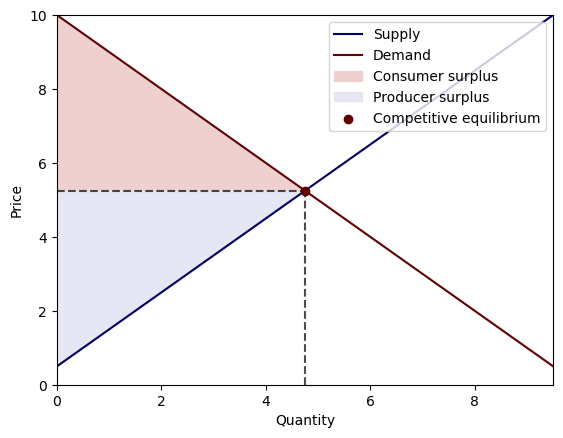

In [11]:
Pi = np.array([[1]])  # the matrix now is a singleton
b = np.array([10])
h = np.array([0.5])
J = np.array([[1]])
mu = 1

PE = ProductionEconomy(Pi, b, h, J, mu)
c, p = PE.competitive_equilibrium()

print('Competitive equilibrium price:', p.item())
print('Competitive equilibrium allocation:', c.item())

# plot
plot_competitive_equilibrium(PE)

In [12]:
c_surplus, p_surplus = PE.compute_surplus()

print('Consumer surplus:', c_surplus.item())
print('Producer surplus:', p_surplus.item())

Consumer surplus: 11.28125
Producer surplus: 11.28125


Competitive equilibrium price: 3.5
Competitive equilibrium allocation: 3.0


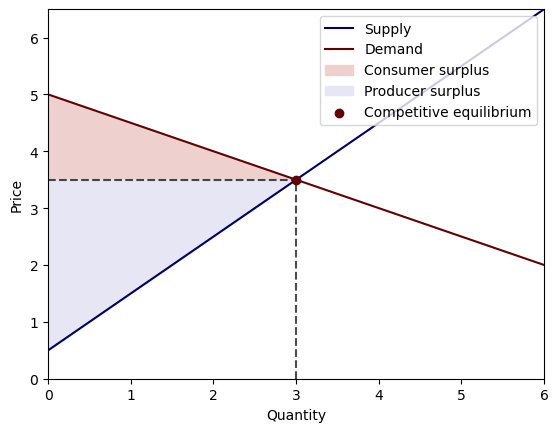

In [13]:
PE.mu = 2
c, p = PE.competitive_equilibrium()

print('Competitive equilibrium price:', p.item())
print('Competitive equilibrium allocation:', c.item())

# plot
plot_competitive_equilibrium(PE)

In [14]:
c_surplus, p_surplus = PE.compute_surplus()

print('Consumer surplus:', c_surplus.item())
print('Producer surplus:', p_surplus.item())

Consumer surplus: 2.25
Producer surplus: 4.5


Competitive equilibrium price: 7.75
Competitive equilibrium allocation: 7.25


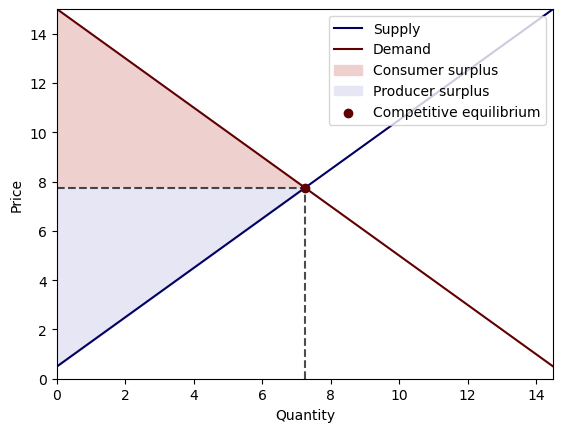

In [15]:
PE.mu = 1
PE.b = PE.b * 1.5
c, p = PE.competitive_equilibrium()

print('Competitive equilibrium price:', p.item())
print('Competitive equilibrium allocation:', c.item())

# plot
plot_competitive_equilibrium(PE)

In [16]:
Pi = np.array([[1, 0],
               [0, 1]])
b = np.array([10, 10])

h = np.array([0.5, 0.5])
J = np.array([[1, 0.5],
              [0.5, 1]])
mu = 1

PE = ProductionEconomy(Pi, b, h, J, mu)
c, p = PE.competitive_equilibrium()

print('Competitive equilibrium price:', p)
print('Competitive equilibrium allocation:', c)

Competitive equilibrium price: [6.2 6.2]
Competitive equilibrium allocation: [3.8 3.8]


In [17]:
PE.b = np.array([12, 10])

c, p = PE.competitive_equilibrium()

print('Competitive equilibrium price:', p)
print('Competitive equilibrium allocation:', c)

Competitive equilibrium price: [7.13333333 6.46666667]
Competitive equilibrium allocation: [4.86666667 3.53333333]


In [18]:
Pi = np.array([[1, 0.5],
                [0.5, 1]])
b = np.array([10, 10])

h = np.array([0.5, 0.5])
J = np.array([[1, 0.5],
                [0.5, 1]])
mu = 1

PE = ProductionEconomy(Pi, b, h, J, mu)
c, p = PE.competitive_equilibrium()

print('Competitive equilibrium price:', p)
print('Competitive equilibrium allocation:', c)

Competitive equilibrium price: [6.3 6.3]
Competitive equilibrium allocation: [3.86666667 3.86666667]


In [19]:
PE.b = np.array([12, 10])
c, p = PE.competitive_equilibrium()

print('Competitive equilibrium price:', p)
print('Competitive equilibrium allocation:', c)

Competitive equilibrium price: [7.23333333 6.56666667]
Competitive equilibrium allocation: [4.93333333 3.6       ]


In [20]:
def plot_monopoly(PE):
    """
    Plot demand curve, marginal production cost and revenue, surpluses and the
    equilibrium in a monopolist supplier economy with a single good

    Args:
        PE (class): A initialized production economy class
    """
    # get singleton value
    J, h, Pi, b, mu = PE.J.item(), PE.h.item(), PE.Pi.item(), PE.b.item(), PE.mu
    H = J

    # compute competitive equilibrium
    c, p = PE.competitive_equilibrium()
    q, pm = PE.equilibrium_with_monopoly()
    c, p, q, pm = c.item(), p.item(), q.item(), pm.item()

    # compute

    # inverse supply/demand curve
    marg_cost = lambda x: h + H * x
    marg_rev = lambda x: -2 * 1 / mu * Pi * Pi * x + 1 / mu * Pi * b
    demand_inv = lambda x: 1 / mu * (Pi * b - Pi * Pi * x)

    xs = np.linspace(0, 2 * c, 100)
    pms = np.ones(100) * pm
    marg_cost_curve = marg_cost(xs)
    marg_rev_curve = marg_rev(xs)
    demand_curve = demand_inv(xs)

    # plot
    plt.figure()
    plt.plot(xs, marg_cost_curve, label='Marginal cost', color='#020060')
    plt.plot(xs, marg_rev_curve, label='Marginal revenue', color='#E55B13')
    plt.plot(xs, demand_curve, label='Demand', color='#600001')

    plt.fill_between(xs[xs <= q], demand_curve[xs <= q], pms[xs <= q], label='Consumer surplus', color='#EED1CF')
    plt.fill_between(xs[xs <= q], marg_cost_curve[xs <= q], pms[xs <= q], label='Producer surplus', color='#E6E6F5')

    plt.vlines(c, 0, p, linestyle="dashed", color='black', alpha=0.7)
    plt.hlines(p, 0, c, linestyle="dashed", color='black', alpha=0.7)
    plt.scatter(c, p, zorder=10, label='Competitive equilibrium', color='#600001')

    plt.vlines(q, 0, pm, linestyle="dashed", color='black', alpha=0.7)
    plt.hlines(pm, 0, q, linestyle="dashed", color='black', alpha=0.7)
    plt.scatter(q, pm, zorder=10, label='Equilibrium with monopoly', color='#E55B13')

    plt.legend(loc='upper right')
    plt.margins(x=0, y=0)
    plt.ylim(0)
    plt.xlabel('Quantity')
    plt.ylabel('Price')
    plt.show()

In [21]:
Pi = np.array([[1, 0],
               [0, 1.2]])
b = np.array([10, 10])

h = np.array([0.5, 0.5])
J = np.array([[1, 0.5],
              [0.5, 1]])
mu = 1

PE = ProductionEconomy(Pi, b, h, J, mu)
c, p = PE.competitive_equilibrium()
q, pm = PE.equilibrium_with_monopoly()

print('Competitive equilibrium price:', p)
print('Competitive equilibrium allocation:', c)

print('Equilibrium with monopolist supplier price:', pm)
print('Equilibrium with monopolist supplier allocation:', q)

Competitive equilibrium price: [6.23542117 6.32397408]
Competitive equilibrium allocation: [3.76457883 3.94168467]
Equilibrium with monopolist supplier price: [7.26865672 8.23880597]
Equilibrium with monopolist supplier allocation: [2.73134328 2.6119403 ]


Competitive equilibrium price: 5.25
Competitive equilibrium allocation: 4.75
Equilibrium with monopolist supplier price: 6.833333333333334
Equilibrium with monopolist supplier allocation: 3.1666666666666665


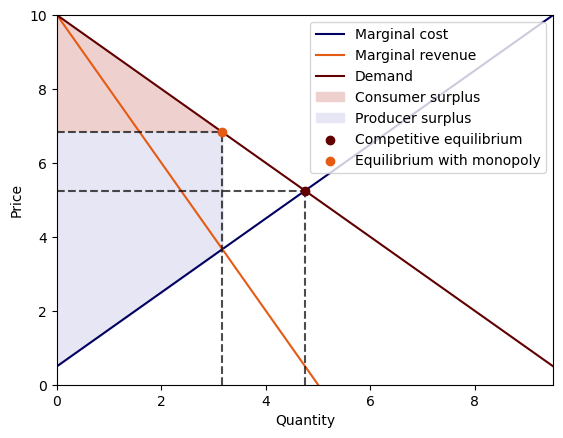

In [22]:
Pi = np.array([[1]])  # the matrix now is a singleton
b = np.array([10])
h = np.array([0.5])
J = np.array([[1]])
mu = 1

PE = ProductionEconomy(Pi, b, h, J, mu)
c, p = PE.competitive_equilibrium()
q, pm = PE.equilibrium_with_monopoly()

print('Competitive equilibrium price:', p.item())
print('Competitive equilibrium allocation:', c.item())

print('Equilibrium with monopolist supplier price:', pm.item())
print('Equilibrium with monopolist supplier allocation:', q.item())

# plot
plot_monopoly(PE)